Git-Hub Link: https://github.com/dhineshkandra/Exploratory_Data_Analysis_TH_Digital_Assessment

In [1]:
# Name: Dhinesh Kandra
# Registration Number: 21BDS0030
# Course: Exploratory Data Analysis Theory - BCSE331L
# Theory Digital Assignment:

In [2]:
#Question:
#Develop a model for the below dataset using Python Code.
 #Dataset Link: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Fishing.csv
 #Procedure to Follow:
 #1. Create a github account and from the personal Google Colab interface your account.
 #2. Load the Dataset and explore Dimension, Summary, Data Handling, Data Cleaning,
 #Univariate, Bivariate and Multivariate Analysis (Maximum of all the possibilities).
 #3. Complete your task in parallel align to the Theory Session (From Module 2 to Module 7)
 #4. To know more about the dataset attributes you can search in web.

In [3]:
# Solution:

In [4]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr, kendalltau
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import scipy.stats as stats

In [5]:
# Loading the Dataset
file_path = '/content/.config/Fishing.csv'
fishing_data = pd.read_csv(file_path)

In [6]:
# 1. Data Inspection and Initial Exploration:

In [7]:
# Initial Data Checks:
print("Data Shape:", fishing_data.shape)
print("\nColumn Data Types:\n", fishing_data.dtypes)
print("\nMissing Values:\n", fishing_data.isnull().sum())
print("\nDuplicate Entries:", fishing_data.duplicated().sum())
print("\nUnique Values per Column:\n", fishing_data.nunique())
print("\nFirst 5 Rows of the Dataset:\n", fishing_data.head())
print("\nData Summary:\n", fishing_data.describe())

Data Shape: (1182, 13)

Column Data Types:
 rownames      int64
mode         object
price       float64
catch       float64
pbeach      float64
ppier       float64
pboat       float64
pcharter    float64
cbeach      float64
cpier       float64
cboat       float64
ccharter    float64
income      float64
dtype: object

Missing Values:
 rownames    0
mode        0
price       0
catch       0
pbeach      0
ppier       0
pboat       0
pcharter    0
cbeach      0
cpier       0
cboat       0
ccharter    0
income      0
dtype: int64

Duplicate Entries: 0

Unique Values per Column:
 rownames    1182
mode           4
price        539
catch         71
pbeach       505
ppier        505
pboat        427
pcharter     576
cbeach         4
cpier         10
cboat         36
ccharter      30
income        15
dtype: int64

First 5 Rows of the Dataset:
    rownames     mode    price   catch   pbeach    ppier    pboat  pcharter  \
0         1  charter  182.930  0.5391  157.930  157.930  157.930   182.930  

In [8]:
# Check for Missing Values:
fishing_data.isna().sum()

,0
rownames,0
mode,0
price,0
catch,0
pbeach,0
ppier,0
pboat,0
pcharter,0
cbeach,0
cpier,0


In [9]:
# Rename Columns for Readability:
fishing_data.rename(columns={
    'rownames': 'RowID',
    'pbeach': 'PriceBeach',
    'ppier': 'PricePier',
    'pboat': 'PriceBoat',
    'pcharter': 'PriceCharter',
    'cbeach': 'CatchBeach',
    'cpier': 'CatchPier',
    'cboat': 'CatchBoat',
    'ccharter': 'CatchCharter'
}, inplace=True)
print("\nRenamed Columns:\n", fishing_data.columns)

# Check for Updated Column Names and Types:
fishing_data.info()


Renamed Columns:
 Index(['RowID', 'mode', 'price', 'catch', 'PriceBeach', 'PricePier',
       'PriceBoat', 'PriceCharter', 'CatchBeach', 'CatchPier', 'CatchBoat',
       'CatchCharter', 'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         1182 non-null   int64  
 1   mode          1182 non-null   object 
 2   price         1182 non-null   float64
 3   catch         1182 non-null   float64
 4   PriceBeach    1182 non-null   float64
 5   PricePier     1182 non-null   float64
 6   PriceBoat     1182 non-null   float64
 7   PriceCharter  1182 non-null   float64
 8   CatchBeach    1182 non-null   float64
 9   CatchPier     1182 non-null   float64
 10  CatchBoat     1182 non-null   float64
 11  CatchCharter  1182 non-null   float64
 12  income        1182 non-null   float64
dtypes: float64(11), int64(1

In [10]:
# Encoding 'mode' column to numeric values if it’s categorical:
if fishing_data['mode'].dtype == 'object':
    le = LabelEncoder()
    fishing_data['mode'] = le.fit_transform(fishing_data['mode'])

In [11]:
# 2. Exploratory Visualizations:

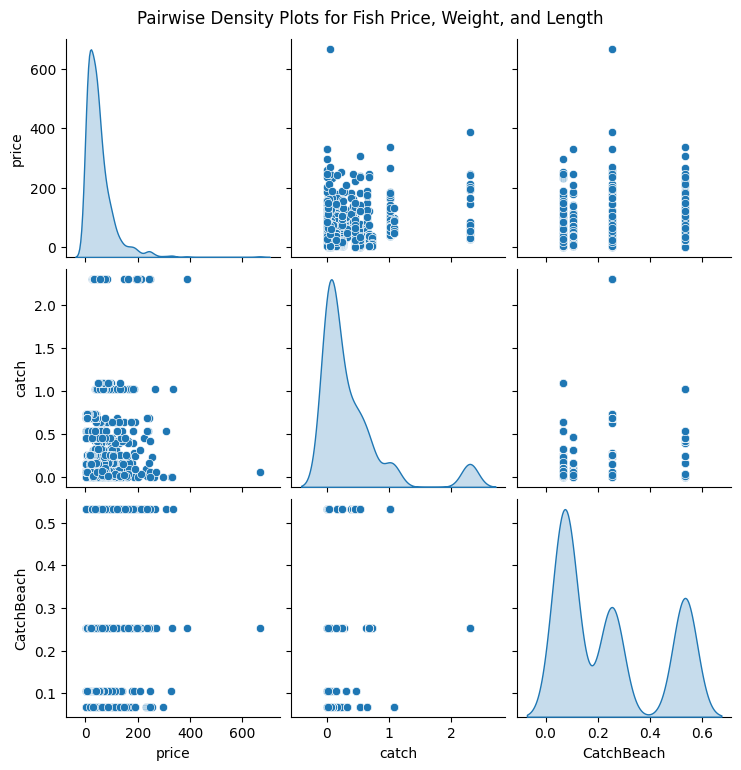

In [12]:
# Pairwise Density Plots for Continuous Variables
# Using pairplot to visualize distribution overlaps and pairwise relationships

# Selecting these columns
selected_columns = ['price', 'catch', 'CatchBeach']

# Create the pairplot
sns.pairplot(fishing_data[selected_columns], diag_kind='kde')
plt.suptitle('Pairwise Density Plots for Fish Price, Weight, and Length', y=1.02)
plt.show()


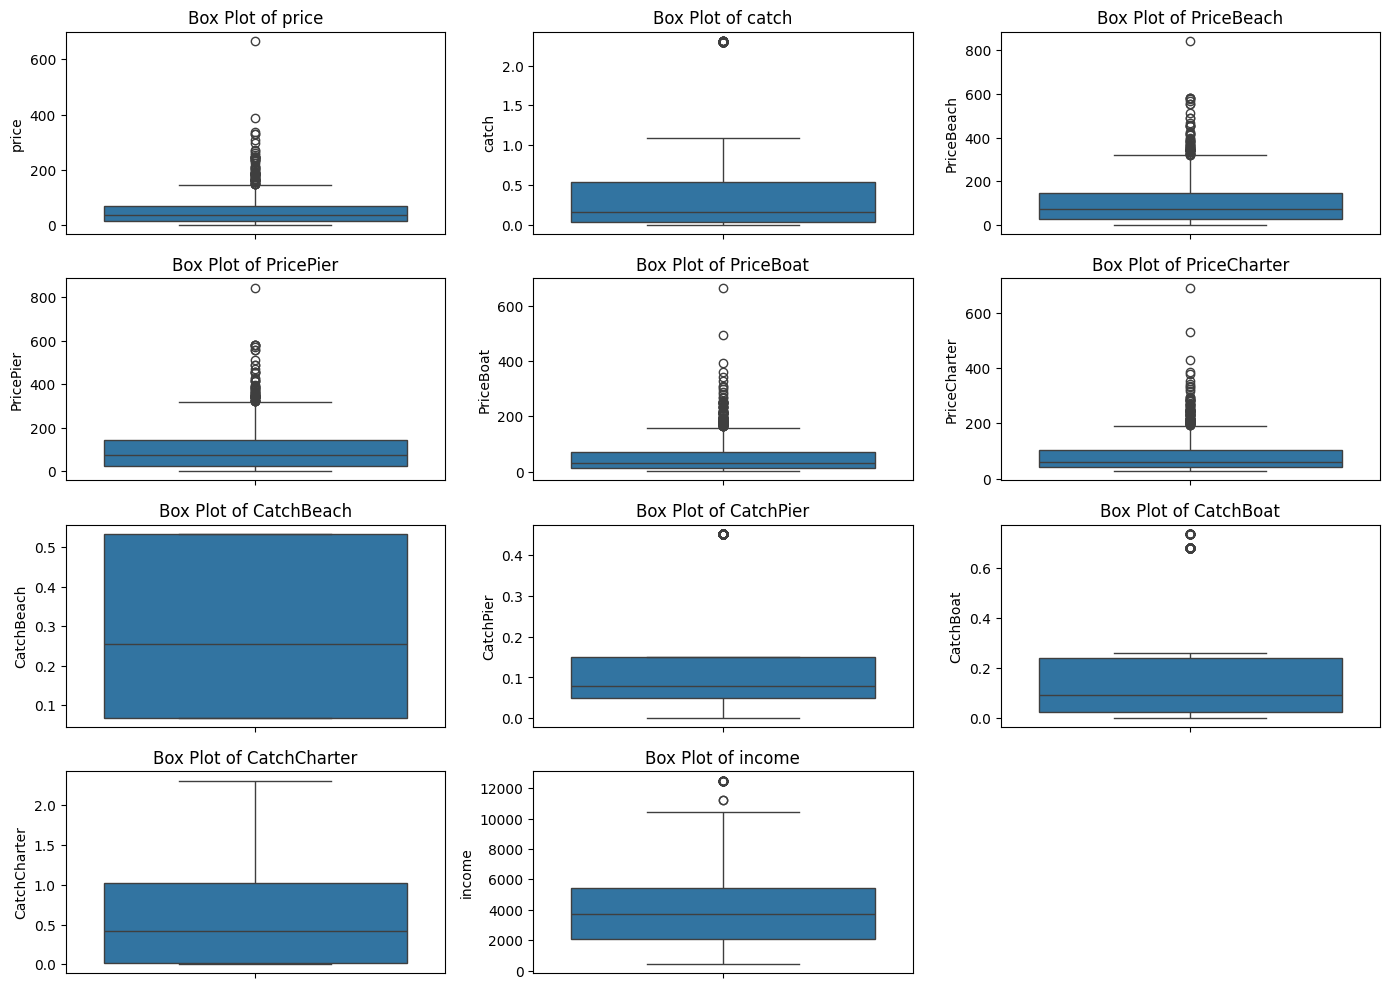

In [13]:
# Box Plots for Outlier Detection
plt.figure(figsize=(14, 10))
for i, col in enumerate(['price', 'catch', 'PriceBeach', 'PricePier', 'PriceBoat', 'PriceCharter', 'CatchBeach', 'CatchPier', 'CatchBoat', 'CatchCharter', 'income']):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=fishing_data, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

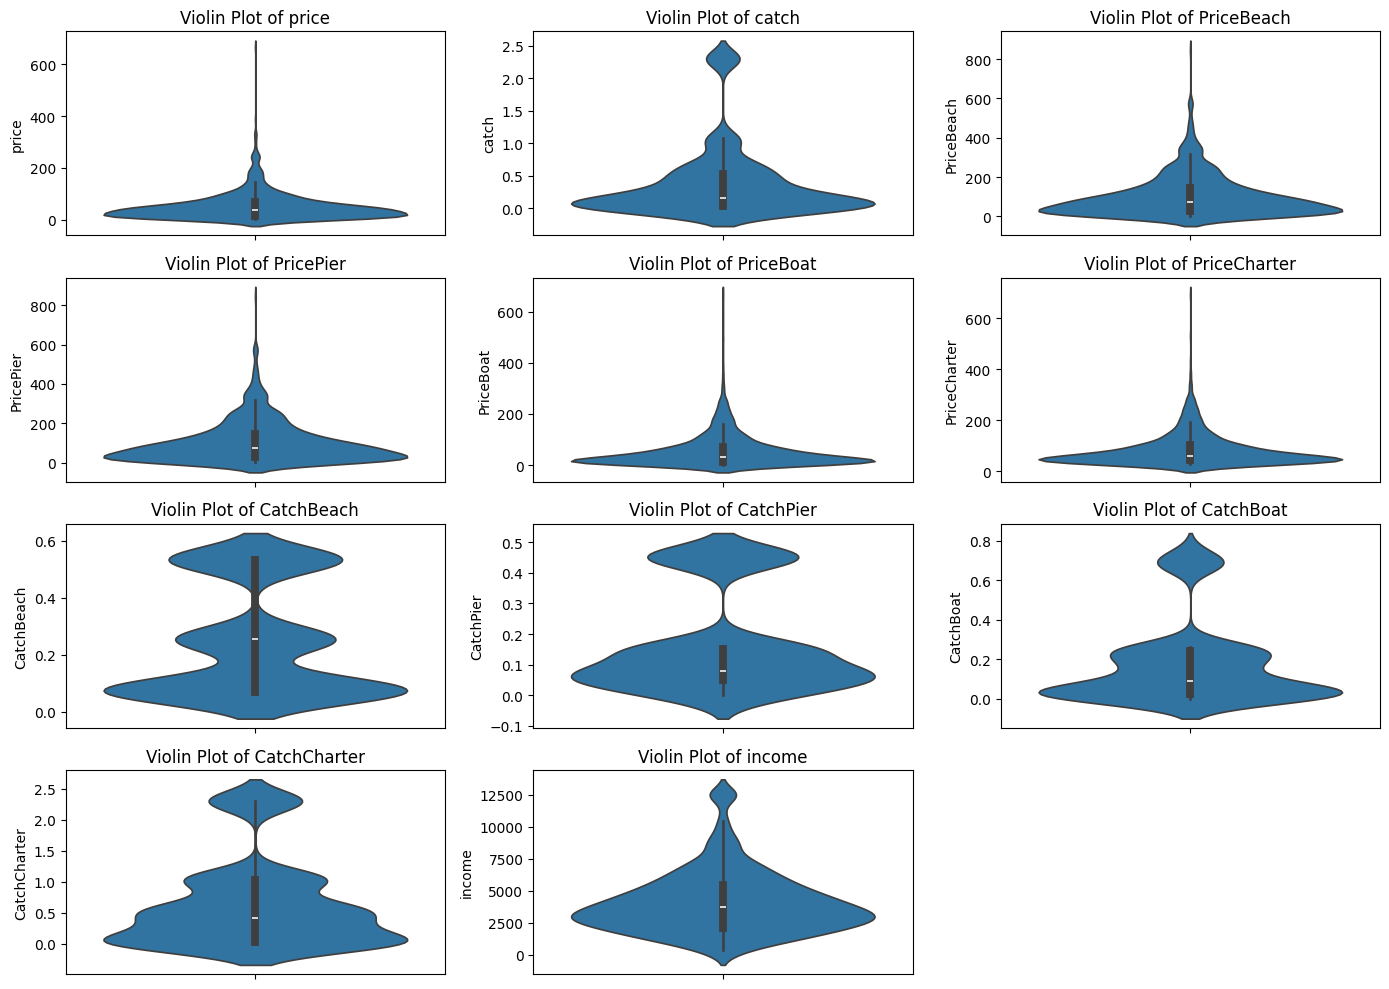

In [14]:
# Violin Plots for Variable Spread Analysis
plt.figure(figsize=(14, 10))
for i, col in enumerate(['price', 'catch', 'PriceBeach', 'PricePier', 'PriceBoat', 'PriceCharter', 'CatchBeach', 'CatchPier', 'CatchBoat', 'CatchCharter', 'income']):
    plt.subplot(4, 3, i+1)
    sns.violinplot(data=fishing_data, y=col)
    plt.title(f'Violin Plot of {col}')
plt.tight_layout()
plt.show()


In [15]:
# 3. Data Transformation:

In [16]:
# Deduplication: Identify and Remove Duplicate Rows
initial_row_count = fishing_data.shape[0]
fishing_data.drop_duplicates(inplace=True)
final_row_count = fishing_data.shape[0]
print(f"Number of duplicate rows removed: {initial_row_count - final_row_count}")

Number of duplicate rows removed: 0


In [17]:
# Discretization and Binning
# Quantile Binning (Quartiles) for 'price', 'income', and 'catch'
# These bins divide the data into four equal parts (quartiles)
fishing_data['price_bin'] = pd.qcut(fishing_data['price'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
fishing_data['income_bin'] = pd.qcut(fishing_data['income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
fishing_data['catch_bin'] = pd.qcut(fishing_data['catch'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [18]:
# Outlier Treatment:
# Detect and Treat outliers in 'price', 'income', and 'catch' using the IQR method:

def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replacing outliers with boundary values:
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

# Applying outlier treatment to the following columns
for col in ['price', 'income', 'catch']:
    treat_outliers(fishing_data, col)

price: Lower Bound = -61.59450000000002, Upper Bound = 144.97750000000002
income: Lower Bound = -2916.667049999999, Upper Bound = 10416.666949999999
catch: Lower Bound = -0.7097, Upper Bound = 1.2791000000000001


In [19]:
# Check for Missing Values:
missing_values = fishing_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 RowID           0
mode            0
price           0
catch           0
PriceBeach      0
PricePier       0
PriceBoat       0
PriceCharter    0
CatchBeach      0
CatchPier       0
CatchBoat       0
CatchCharter    0
income          0
price_bin       0
income_bin      0
catch_bin       0
dtype: int64


In [20]:
print("\nData after transformations:")
print(fishing_data.head())


Data after transformations:
   RowID  mode     price   catch  PriceBeach  PricePier  PriceBoat  \
0      1     2  144.9775  0.5391     157.930    157.930    157.930   
1      2     2   34.5340  0.4671      15.114     15.114     10.534   
2      3     1   24.3340  0.2413     161.874    161.874     24.334   
3      4     3   15.1340  0.0789      15.134     15.134     55.930   
4      5     1   41.5140  0.1082     106.930    106.930     41.514   

   PriceCharter  CatchBeach  CatchPier  CatchBoat  CatchCharter     income  \
0       182.930      0.0678     0.0503     0.2601        0.5391  7083.3317   
1        34.534      0.1049     0.0451     0.1574        0.4671  1249.9998   
2        59.334      0.5333     0.4522     0.2413        1.0266  3749.9999   
3        84.930      0.0678     0.0789     0.1643        0.5391  2083.3332   
4        71.014      0.0678     0.0503     0.1082        0.3240  4583.3320   

   price_bin income_bin  catch_bin  
0  Very High  Very High  Very High  
1     M

In [21]:
# Summarize binned columns
print("\nBinned Column Summaries:")
print("Price Bins:\n", fishing_data['price_bin'].value_counts())
print("Income Bins:\n", fishing_data['income_bin'].value_counts())
print("Catch Bins:\n", fishing_data['catch_bin'].value_counts())


Binned Column Summaries:
Price Bins:
 price_bin
Low          310
Very High    296
High         294
Medium       282
Name: count, dtype: int64
Income Bins:
 income_bin
Medium       403
Low          311
High         244
Very High    224
Name: count, dtype: int64
Catch Bins:
 catch_bin
High         326
Low          302
Medium       290
Very High    264
Name: count, dtype: int64


In [22]:
# 4. Correlation and Time Series Analysis

In [23]:
# Correlation Analysis: Select only numeric columns
numeric_data = fishing_data.select_dtypes(include=[np.number])

In [24]:
# Pearson Correlation Matrix
pearson_corr = numeric_data.corr(method='pearson')
print("\nPearson Correlation Matrix:\n", pearson_corr)


Pearson Correlation Matrix:
                  RowID      mode     price     catch  PriceBeach  PricePier  \
RowID         1.000000 -0.055977 -0.236502  0.295905   -0.098860  -0.098860   
mode         -0.055977  1.000000  0.123642  0.138717   -0.084282  -0.084282   
price        -0.236502  0.123642  1.000000  0.126678    0.425139   0.425139   
catch         0.295905  0.138717  0.126678  1.000000    0.011693   0.011693   
PriceBeach   -0.098860 -0.084282  0.425139  0.011693    1.000000   1.000000   
PricePier    -0.098860 -0.084282  0.425139  0.011693    1.000000   1.000000   
PriceBoat     0.078949 -0.013229  0.519811  0.026405    0.111820   0.111820   
PriceCharter  0.073141 -0.009127  0.528913  0.031514    0.141024   0.141024   
CatchBeach    0.118603  0.035745  0.032829  0.279646    0.331906   0.331906   
CatchPier     0.126478  0.033173  0.001762  0.260814    0.226081   0.226081   
CatchBoat     0.354635 -0.014810 -0.091629  0.712657   -0.098206  -0.098206   
CatchCharter  0.355020

In [25]:
# Spearman Correlation Matrix
spearman_corr = numeric_data.corr(method='spearman')
print("\nSpearman Correlation Matrix:\n", spearman_corr)


Spearman Correlation Matrix:
                  RowID      mode     price     catch  PriceBeach  PricePier  \
RowID         1.000000 -0.063326 -0.255246  0.270043   -0.071431  -0.071431   
mode         -0.063326  1.000000  0.179932  0.127306   -0.108373  -0.108373   
price        -0.255246  0.179932  1.000000  0.074798    0.549339   0.549339   
catch         0.270043  0.127306  0.074798  1.000000   -0.054056  -0.054056   
PriceBeach   -0.071431 -0.108373  0.549339 -0.054056    1.000000   1.000000   
PricePier    -0.071431 -0.108373  0.549339 -0.054056    1.000000   1.000000   
PriceBoat     0.031219  0.013479  0.518609  0.062372    0.137573   0.137573   
PriceCharter  0.001740  0.019994  0.545836  0.059209    0.198618   0.198618   
CatchBeach    0.177117  0.028211 -0.018590  0.322505    0.213811   0.213811   
CatchPier     0.285465  0.021724 -0.084930  0.343463    0.019462   0.019462   
CatchBoat     0.205874  0.027489 -0.106159  0.717632   -0.127926  -0.127926   
CatchCharter  0.23857

In [26]:
# Kendall Correlation Matrix
kendall_corr = numeric_data.corr(method='kendall')
print("\nKendall Correlation Matrix:\n", kendall_corr)


Kendall Correlation Matrix:
                  RowID      mode     price     catch  PriceBeach  PricePier  \
RowID         1.000000 -0.049501 -0.176855  0.181798   -0.052605  -0.052605   
mode         -0.049501  1.000000  0.140048  0.082089   -0.085803  -0.085803   
price        -0.176855  0.140048  1.000000  0.049864    0.413035   0.413035   
catch         0.181798  0.082089  0.049864  1.000000   -0.032180  -0.032180   
PriceBeach   -0.052605 -0.085803  0.413035 -0.032180    1.000000   1.000000   
PricePier    -0.052605 -0.085803  0.413035 -0.032180    1.000000   1.000000   
PriceBoat     0.012985  0.009869  0.428438  0.046840    0.107390   0.107390   
PriceCharter -0.007919  0.016058  0.453335  0.045501    0.148532   0.148532   
CatchBeach    0.138585  0.022836 -0.017072  0.242984    0.160016   0.160016   
CatchPier     0.215800  0.013919 -0.064716  0.245698    0.009882   0.009882   
CatchBoat     0.136266  0.022667 -0.072080  0.558983   -0.087785  -0.087785   
CatchCharter  0.162753

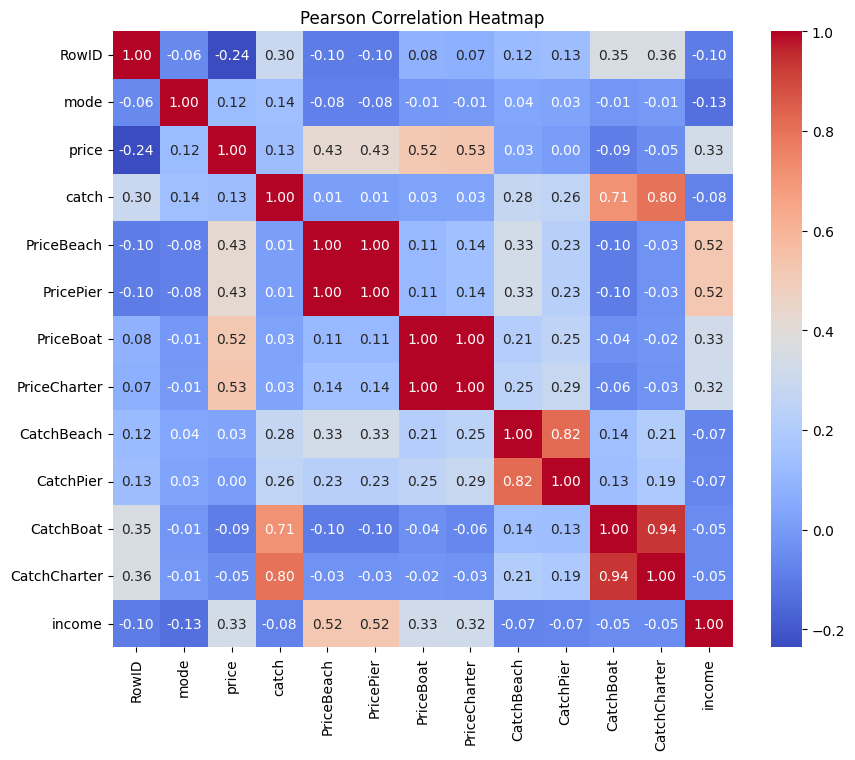

In [27]:
# Visualize Pearson Correlation with a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

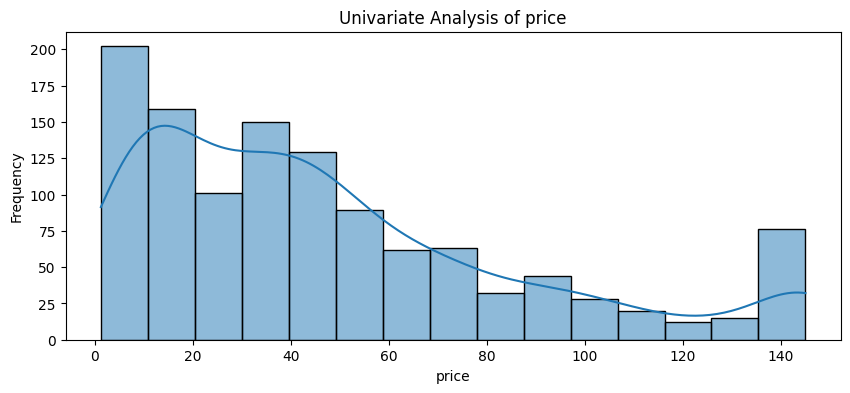

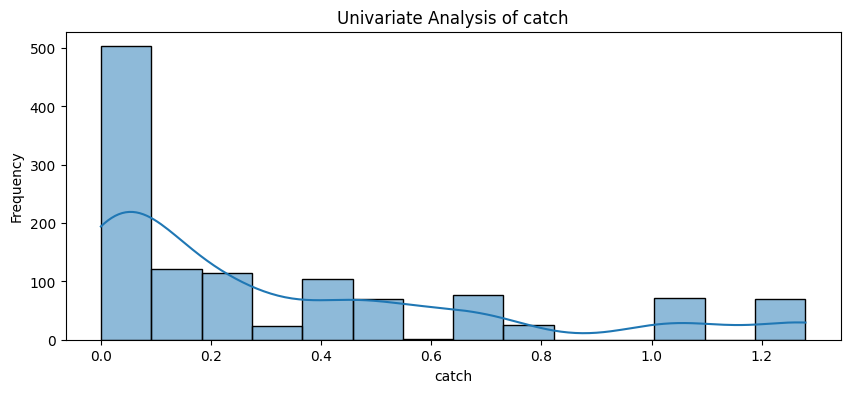

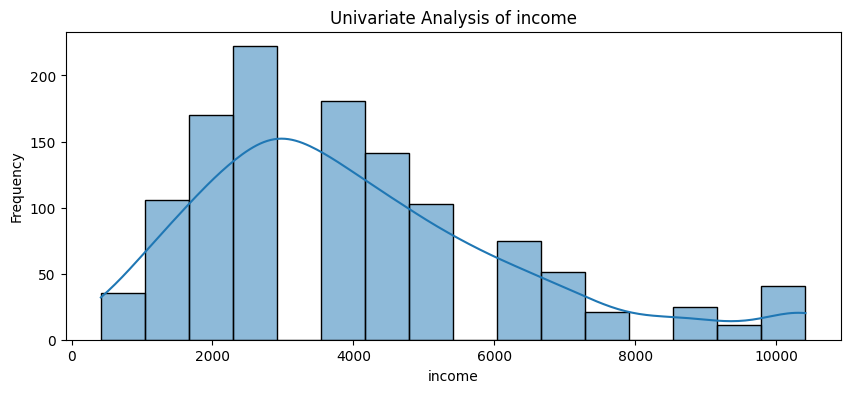

In [28]:
# Univariate Analysis: Histograms and KDE:
for column in ['price', 'catch', 'income']:
    plt.figure(figsize=(10, 4))
    sns.histplot(fishing_data[column], kde=True)
    plt.title(f'Univariate Analysis of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

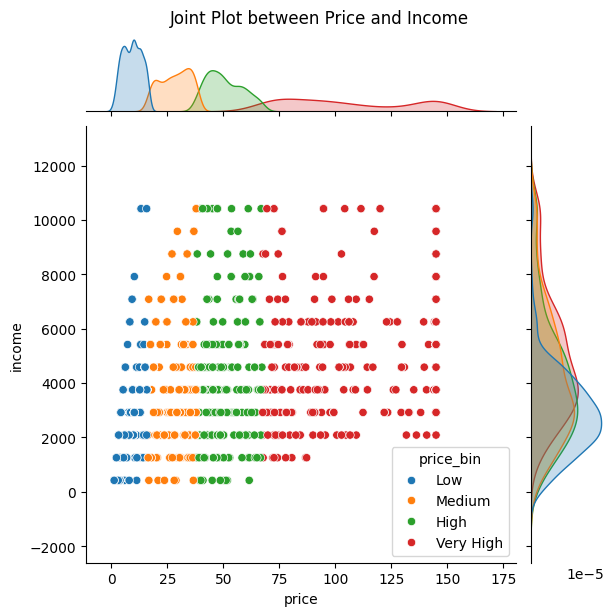

In [29]:
# Bivariate Analysis: Joint and Density Plots:
sns.jointplot(data=fishing_data, x='price', y='income', kind='scatter', hue='price_bin')
plt.suptitle("Joint Plot between Price and Income", y=1.02)
plt.show()

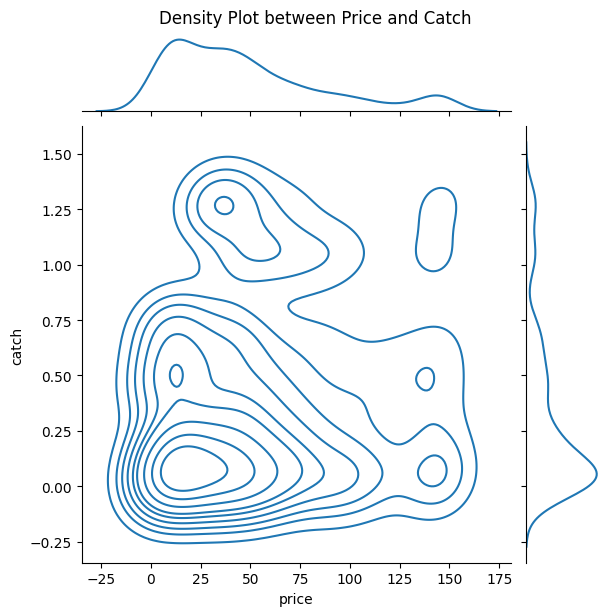

In [30]:
# Density Plot between Price and Catch:
sns.jointplot(data=fishing_data, x='price', y='catch', kind='kde')
plt.suptitle("Density Plot between Price and Catch", y=1.02)
plt.show()

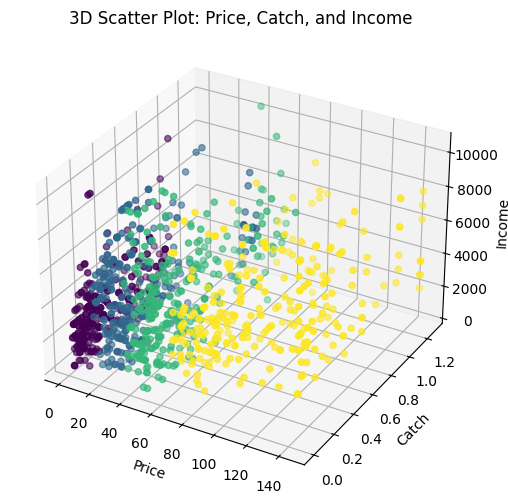

In [31]:
# Multivariate Analysis: 3D Scatter Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fishing_data['price'], fishing_data['catch'], fishing_data['income'], c=fishing_data['price_bin'].cat.codes, cmap='viridis')
ax.set_xlabel('Price')
ax.set_ylabel('Catch')
ax.set_zlabel('Income')
plt.title("3D Scatter Plot: Price, Catch, and Income")
plt.show()

In [32]:
# Time Series Analysis
# Since There is No time-related Data Found in the data, We cannot do the Time Series Analysis.

In [33]:
# 6. Data Summarization and Advanced Visualization:

In [34]:
### Statistical Summarization:
# Detailed Statistics (mean, median, quartiles, skewness, kurtosis):
for column in ['price', 'catch', 'income']:
    print(f"\nStatistics for {column}:")
    print(f"Mean: {fishing_data[column].mean()}")
    print(f"Median: {fishing_data[column].median()}")
    print(f"Quartiles:\n{fishing_data[column].quantile([0.25, 0.5, 0.75])}")
    print(f"Skewness: {skew(fishing_data[column])}")
    print(f"Kurtosis: {kurtosis(fishing_data[column])}")


Statistics for price:
Mean: 48.09213240270728
Median: 37.896
Quartiles:
0.25    15.870
0.50    37.896
0.75    67.513
Name: price, dtype: float64
Skewness: 1.0577523432372746
Kurtosis: 0.31588157415134566

Statistics for catch:
Mean: 0.32875981387478853
Median: 0.1643
Quartiles:
0.25    0.0361
0.50    0.1643
0.75    0.5333
Name: catch, dtype: float64
Skewness: 1.2551416593060567
Kurtosis: 0.5276159280856461

Statistics for income:
Mean: 4043.288043443317
Median: 3749.9999
Quartiles:
0.25    2083.3332
0.50    3749.9999
0.75    5416.6667
Name: income, dtype: float64
Skewness: 0.9378415465822764
Kurtosis: 0.6158004970460023


In [35]:
# Visualizations

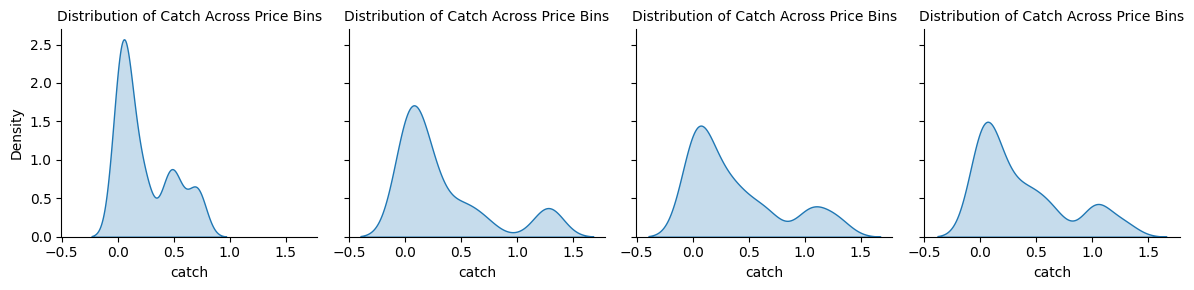

In [36]:
# KDE plots of 'catch' across 'price_bin' categories
g = sns.FacetGrid(fishing_data, col='price_bin')
g.map(sns.kdeplot, 'catch', fill=True)
g.set_titles("Distribution of Catch Across Price Bins")
plt.show()

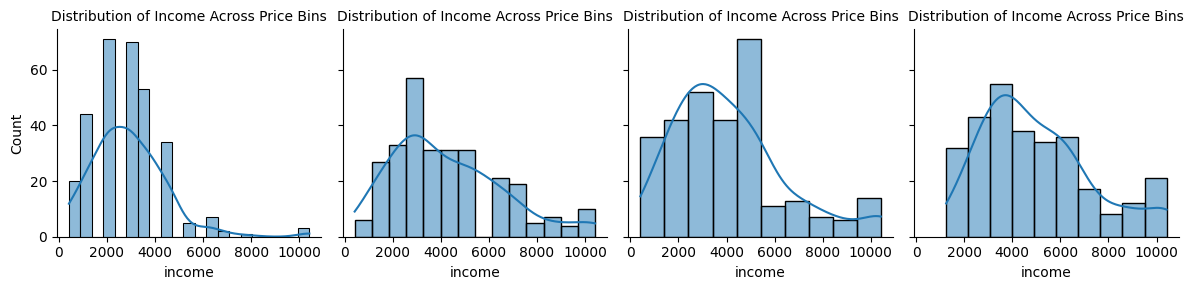

In [37]:
# Histograms of 'income' across 'price_bin' categories
g = sns.FacetGrid(fishing_data, col='price_bin')
g.map(sns.histplot, 'income', kde=True)
g.set_titles("Distribution of Income Across Price Bins")
plt.show()

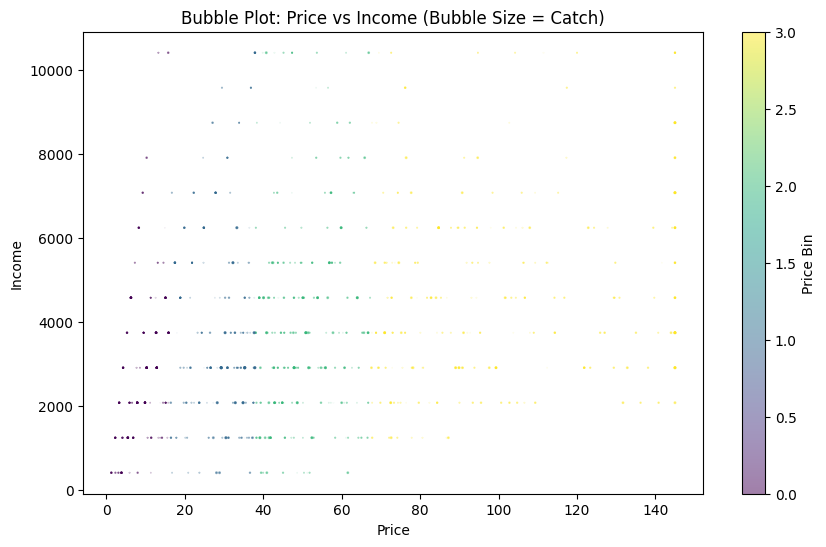

In [38]:
# Bubble Plots for Multi-dimensional Categorical Comparisons
# Bubble Plot: Price vs Income with Bubble Size representing 'catch' and color by 'price_bin'

plt.figure(figsize=(10, 6))
bubble = plt.scatter(x=fishing_data['price'], y=fishing_data['income'],
                     s=fishing_data['catch'], c=fishing_data['price_bin'].cat.codes,
                     alpha=0.5, cmap='viridis')
plt.colorbar(bubble, label='Price Bin')
plt.xlabel('Price')
plt.ylabel('Income')
plt.title('Bubble Plot: Price vs Income (Bubble Size = Catch)')
plt.show()


In [39]:
# 7. Comprehensive Clustering Analysis:

In [40]:
# Data Preparation (Scaling for Clustering Analysis):
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fishing_data[['price', 'catch', 'income']])

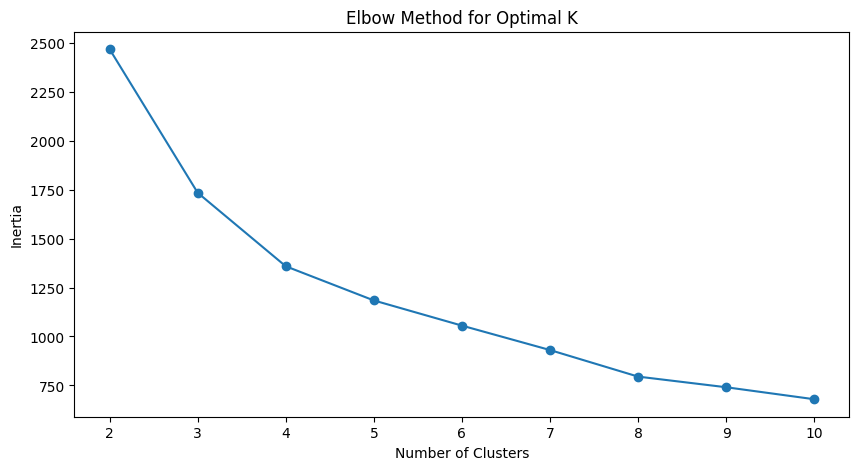

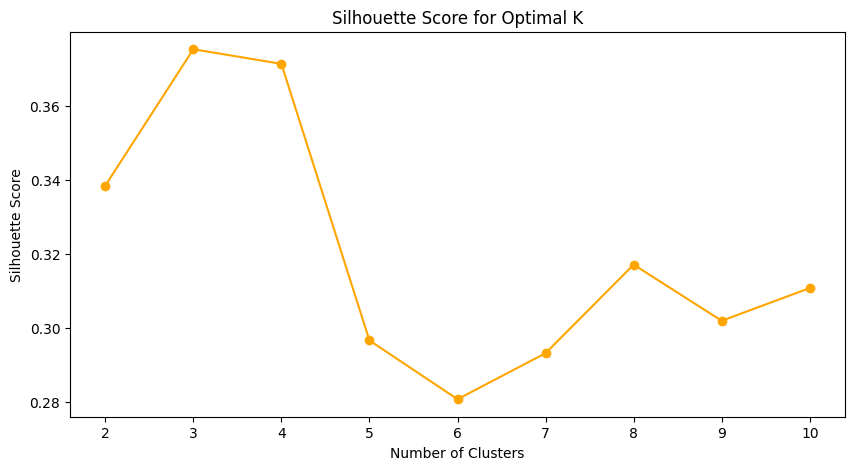

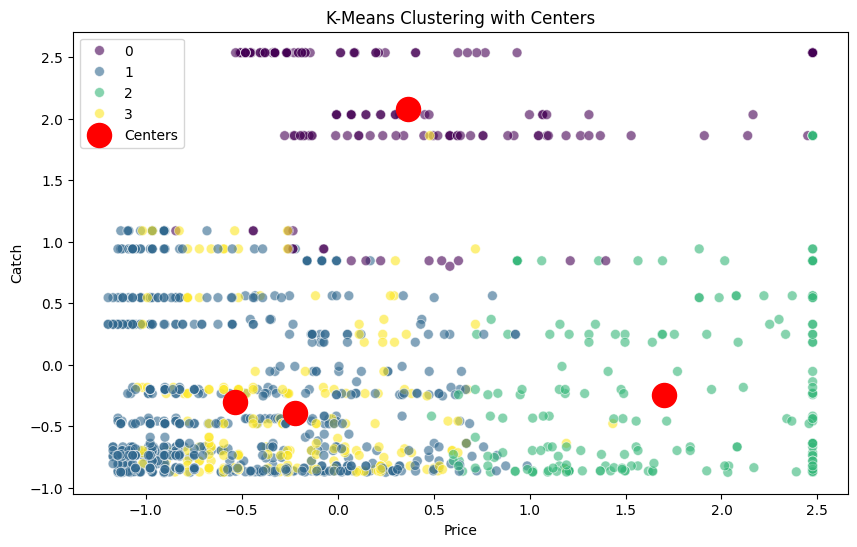

In [41]:
# K-Means Clustering with Elbow Method and Silhouette Score
def kmeans_clustering_analysis(data):
    inertia = []
    silhouette_scores = []
    range_clusters = range(2, 11)

    for k in range_clusters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(10, 5))
    plt.plot(range_clusters, inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Plot Silhouette Score
    plt.figure(figsize=(10, 5))
    plt.plot(range_clusters, silhouette_scores, marker='o', color='orange')
    plt.title('Silhouette Score for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Choosing an optimal K based on above analysis:
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(data)

    # Add cluster labels to the dataset
    fishing_data['KMeans_Cluster'] = clusters

    # Visualize Clusters with Centers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centers')
    plt.title('K-Means Clustering with Centers')
    plt.xlabel('Price')
    plt.ylabel('Catch')
    plt.legend()
    plt.show()

# Call the K-Means Clustering Analysis
kmeans_clustering_analysis(scaled_data)

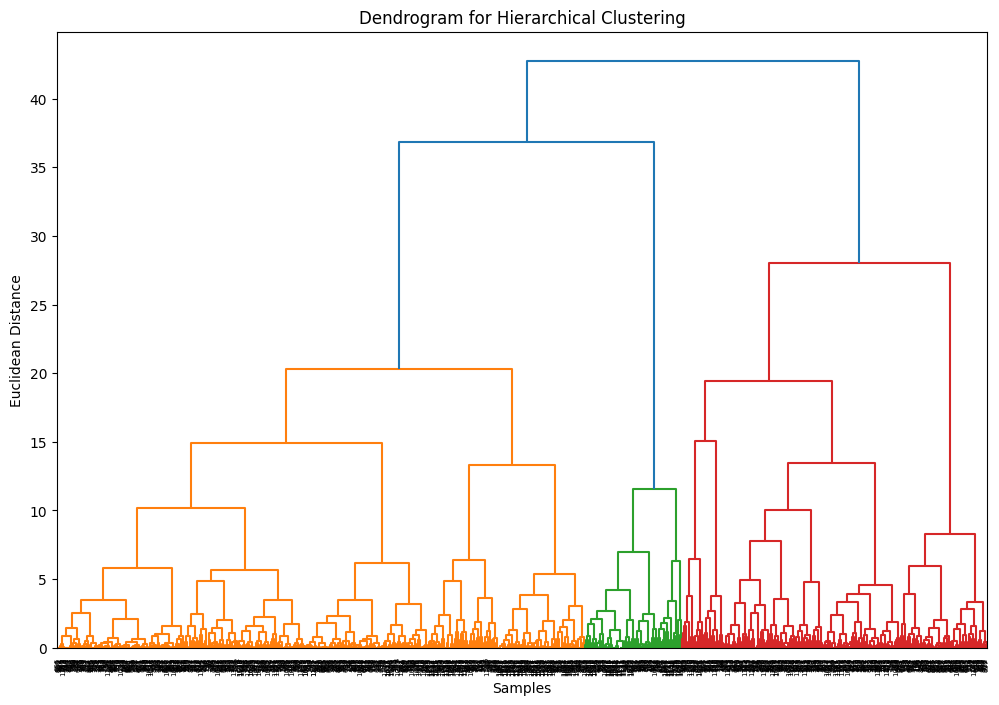

In [42]:
# Hierarchical Clustering with Dendrogram
def hierarchical_clustering_analysis(data):
    plt.figure(figsize=(12, 8))
    linked = linkage(data, 'ward')
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean Distance')
    plt.show()

# Call Hierarchical Clustering Analysis
hierarchical_clustering_analysis(scaled_data)

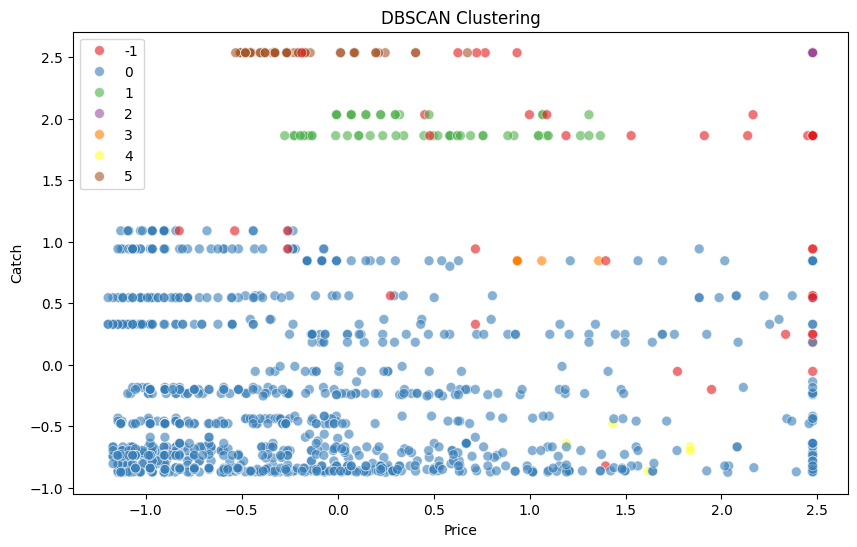

In [43]:
# 5.3 DBSCAN for Density-Based Clustering and Outlier Detection:
def dbscan_clustering_analysis(data):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(data)

    # Add DBSCAN cluster labels to the dataset
    fishing_data['DBSCAN_Cluster'] = clusters

    # Visualize DBSCAN Clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='Set1', s=50, alpha=0.6)
    plt.title('DBSCAN Clustering')
    plt.xlabel('Price')
    plt.ylabel('Catch')
    plt.show()

# Call DBSCAN Clustering Analysis
dbscan_clustering_analysis(scaled_data)

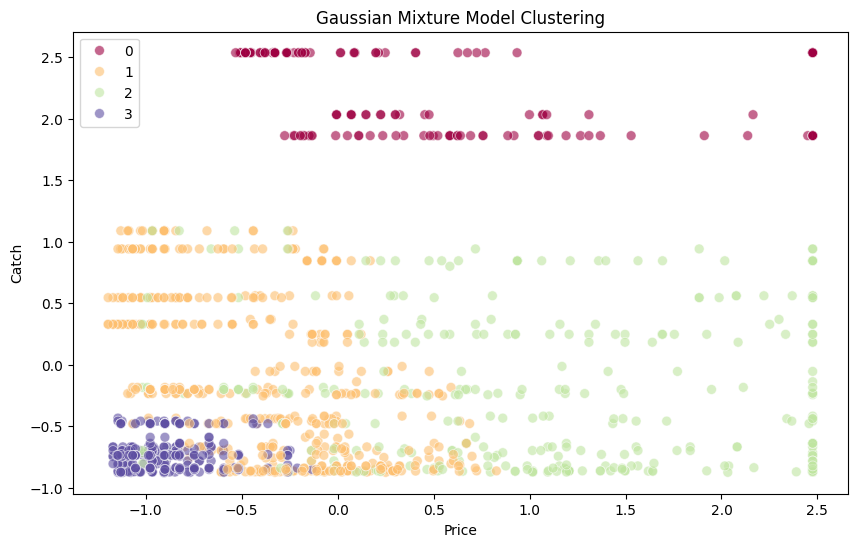

In [44]:
# Gaussian Mixture Model (GMM) for Probabilistic Clustering
def gmm_clustering_analysis(data):
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm.fit(data)
    clusters = gmm.predict(data)

    # Add GMM cluster labels to the dataset
    fishing_data['GMM_Cluster'] = clusters

    # Visualize GMM Clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='Spectral', s=50, alpha=0.6)
    plt.title('Gaussian Mixture Model Clustering')
    plt.xlabel('Price')
    plt.ylabel('Catch')
    plt.show()

# Call GMM Clustering Analysis
gmm_clustering_analysis(scaled_data)

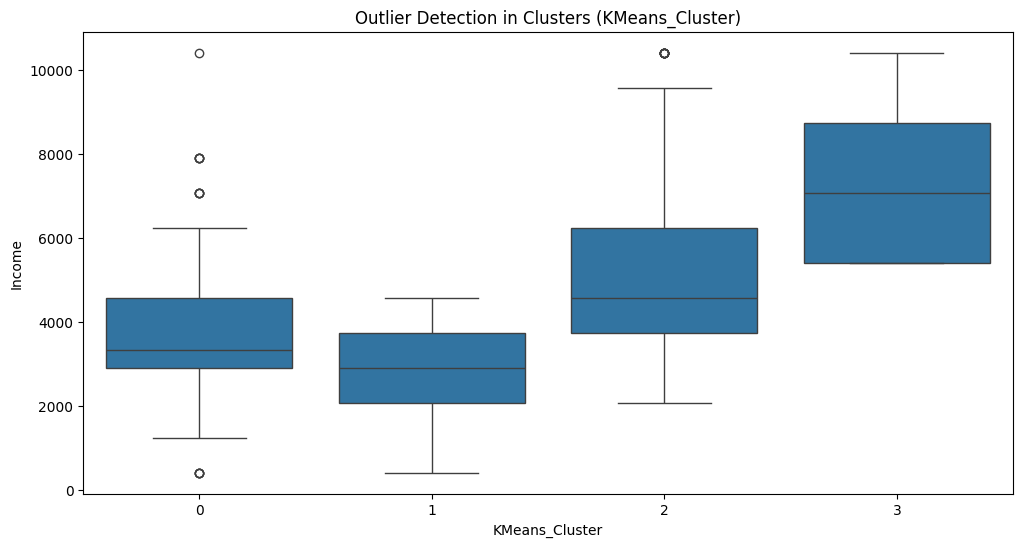

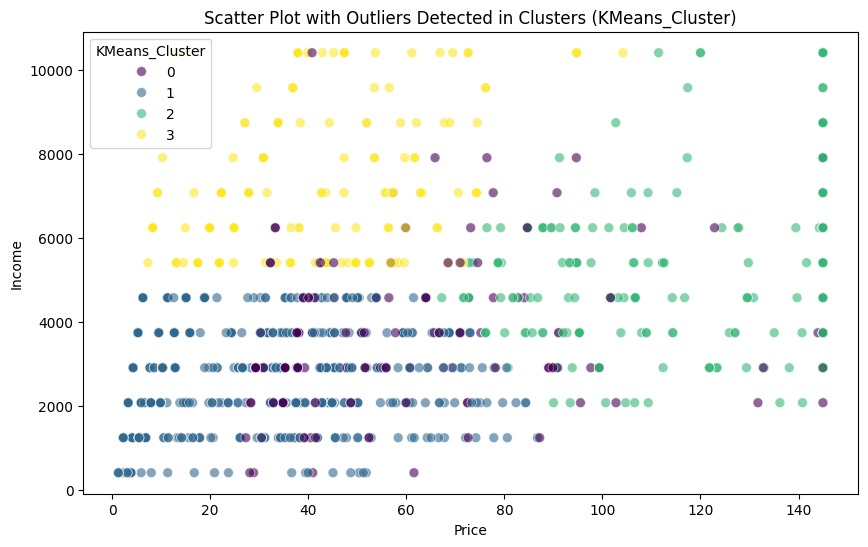

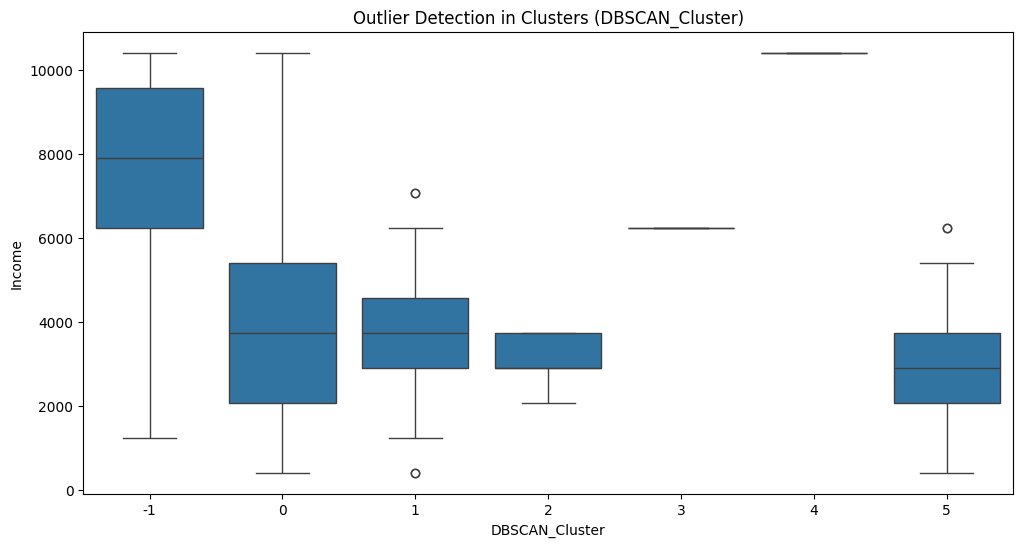

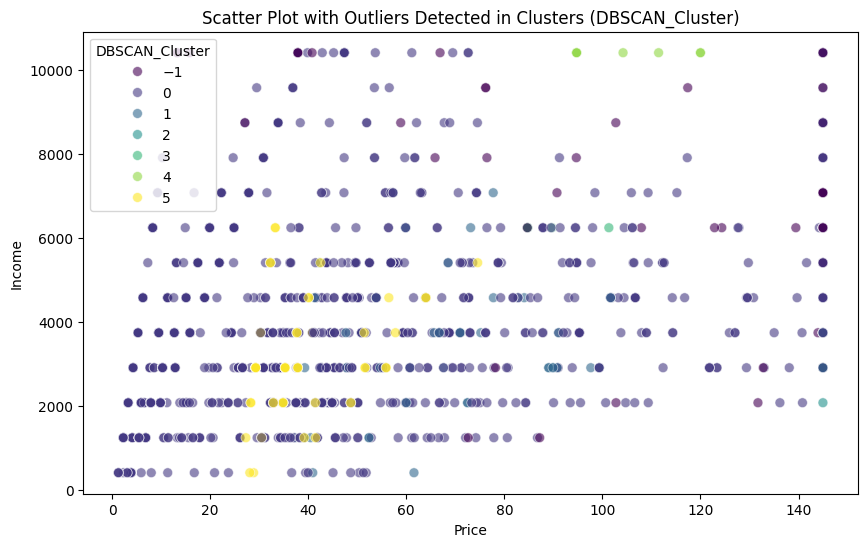

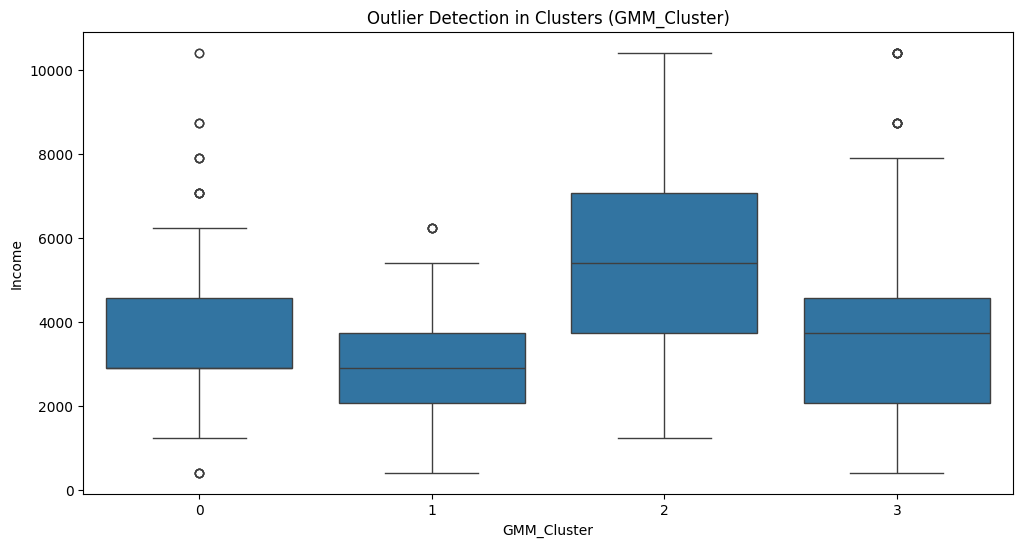

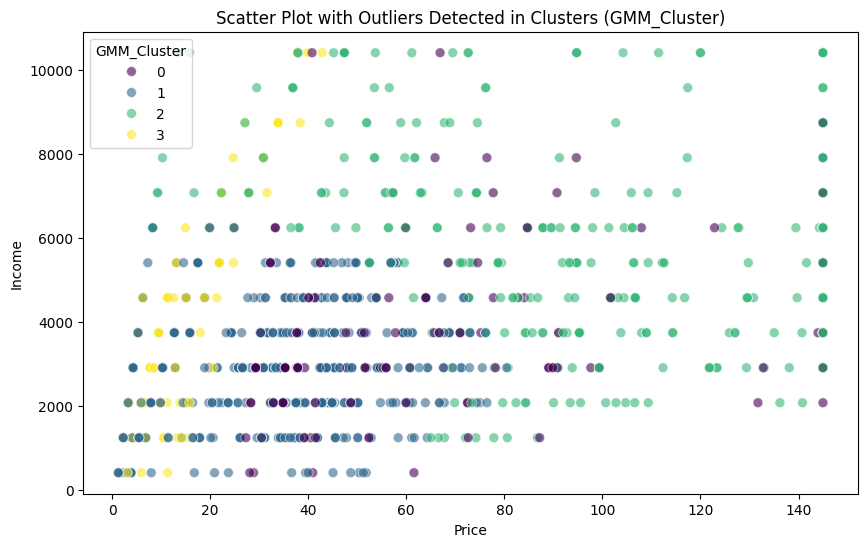

In [45]:
# Outlier Detection within Clusters (Box Plots and Scatter Plots):
def outlier_detection():
    cluster_cols = ['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster']
    for cluster_col in cluster_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cluster_col, y='income', data=fishing_data)
        plt.title(f'Outlier Detection in Clusters ({cluster_col})')
        plt.xlabel(cluster_col)
        plt.ylabel('Income')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=fishing_data, x='price', y='income', hue=cluster_col, palette='viridis', s=50, alpha=0.6)
        plt.title(f'Scatter Plot with Outliers Detected in Clusters ({cluster_col})')
        plt.xlabel('Price')
        plt.ylabel('Income')
        plt.show()

# Call Outlier Detection Visualization
outlier_detection()


In [46]:
# 8. Dimensionality Reduction and Additional Visualizations:

In [47]:
# Ensure data is standardized
scaled_data = scaler.fit_transform(fishing_data[['price', 'catch', 'income']])

Number of components that explain at least 90.0% of the variance: 3


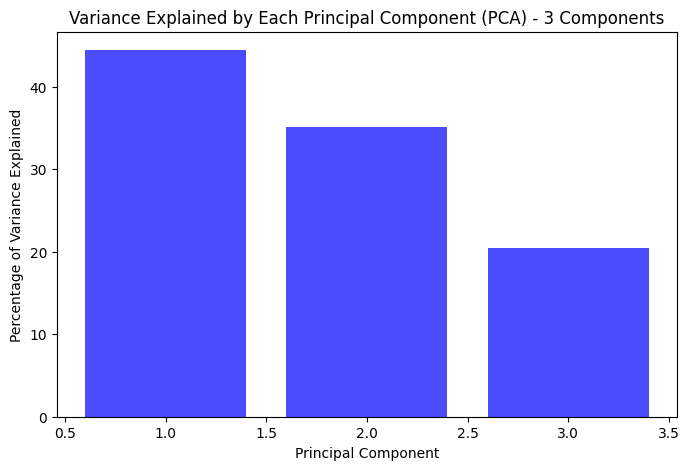

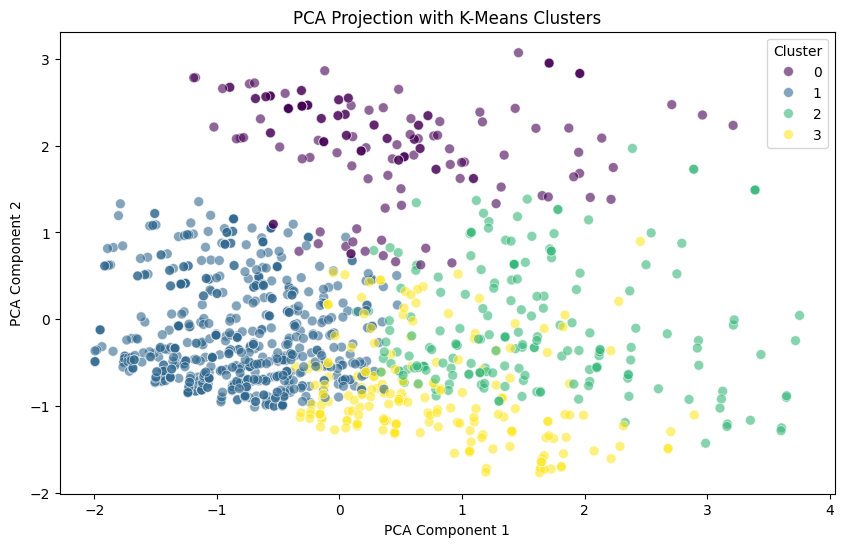

In [48]:
# PCA for Dimensionality Reduction:
def pca_analysis(data, threshold=0.90):
    # Perform PCA without specifying n_components to get all components
    pca = PCA()
    pca_result = pca.fit_transform(data)

    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components that explain at least the threshold percentage of the variance
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    print(f"Number of components that explain at least {threshold * 100}% of the variance: {n_components}")

    # Perform PCA again with the chosen number of components
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)

    # Explained Variance Plot
    explained_variance = pca.explained_variance_ratio_ * 100
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage of Variance Explained')
    plt.title(f'Variance Explained by Each Principal Component (PCA) - {n_components} Components')
    plt.show()

    # Add PCA results back to the dataset for visualization
    fishing_data['PCA1'] = pca_result[:, 0]
    fishing_data['PCA2'] = pca_result[:, 1] if n_components > 1 else None

    # Visualize PCA Result with color-coded clusters (assuming KMeans clustering is already done)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=fishing_data, palette='viridis', s=50, alpha=0.6)
    plt.title('PCA Projection with K-Means Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Call PCA Analysis (using the automatically chosen components)
pca_analysis(scaled_data, threshold=0.90)


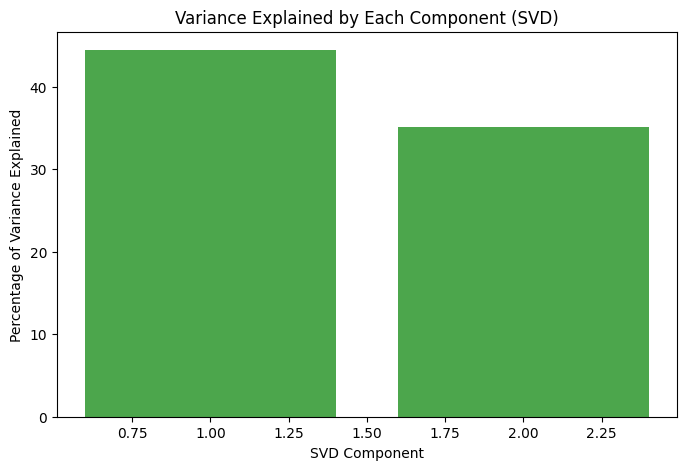

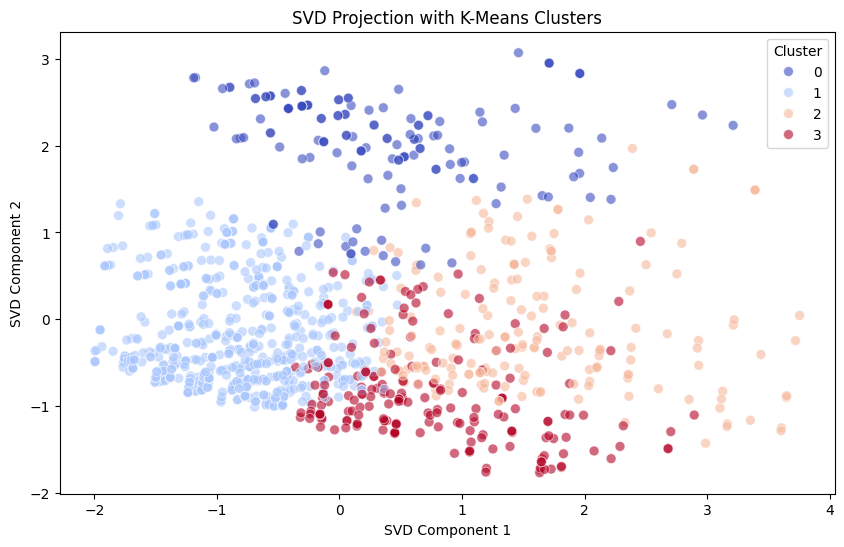

In [49]:
# SVD for Dimensionality Reduction
def svd_analysis(data):
    svd = TruncatedSVD(n_components=2)
    svd_result = svd.fit_transform(data)

    # Explained Variance Plot for SVD Components
    explained_variance = svd.explained_variance_ratio_ * 100
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='green')
    plt.xlabel('SVD Component')
    plt.ylabel('Percentage of Variance Explained')
    plt.title('Variance Explained by Each Component (SVD)')
    plt.show()

    # Add SVD results back to the dataset for visualization
    fishing_data['SVD1'] = svd_result[:, 0]
    fishing_data['SVD2'] = svd_result[:, 1]

    # Visualize SVD Result with color-coded clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='SVD1', y='SVD2', hue='KMeans_Cluster', data=fishing_data, palette='coolwarm', s=50, alpha=0.6)
    plt.title('SVD Projection with K-Means Clusters')
    plt.xlabel('SVD Component 1')
    plt.ylabel('SVD Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Call SVD Analysis
svd_analysis(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


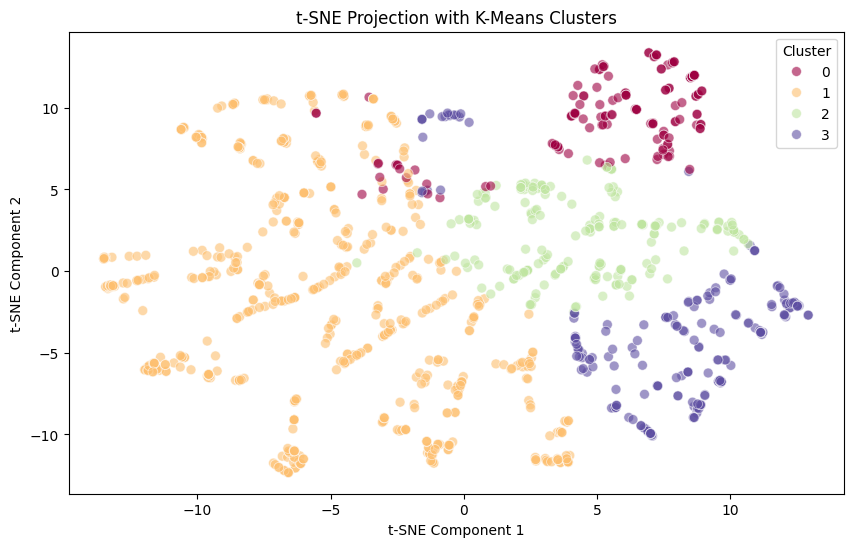

In [50]:
# Non-Linear Methods:

# t-SNE for Dimensionality Reduction
def tsne_analysis(data):
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
    tsne_result = tsne.fit_transform(data)

    # Add t-SNE results back to the dataset for visualization
    fishing_data['tSNE1'] = tsne_result[:, 0]
    fishing_data['tSNE2'] = tsne_result[:, 1]

    # Visualize t-SNE Result with color-coded clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='tSNE1', y='tSNE2', hue='KMeans_Cluster', data=fishing_data, palette='Spectral', s=50, alpha=0.6)
    plt.title('t-SNE Projection with K-Means Clusters')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Call t-SNE Analysis
tsne_analysis(scaled_data)

In [51]:
# 9. Model Development and Evaluation:

In [52]:
# Define target variables and features:
# Predicting 'price' and 'income' using 'catch', 'PCA1', and 'PCA2' from dimensionality reduction:
X = fishing_data[['catch', 'PCA1', 'PCA2']]
y_price = fishing_data['price']
y_income = fishing_data['income']

In [53]:
# Split the data into training and testing sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.3, random_state=42)
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(X, y_income, test_size=0.3, random_state=42)

In [54]:
# Linear Regression Model:
def linear_regression_model(X_train, y_train, X_test, y_test, target_name):
    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions and Model Evaluation
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"\nLinear Regression Model Evaluation for {target_name}:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

    # Residual Analysis
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='skyblue')
    plt.title(f'Residuals Distribution for {target_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    # QQ-plot for Residuals
    plt.figure(figsize=(6, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'QQ Plot of Residuals for {target_name}')
    plt.show()
    return model, r2, mse


Linear Regression Model Evaluation for Price:
R-squared: 1.0000
Mean Squared Error (MSE): 0.0000


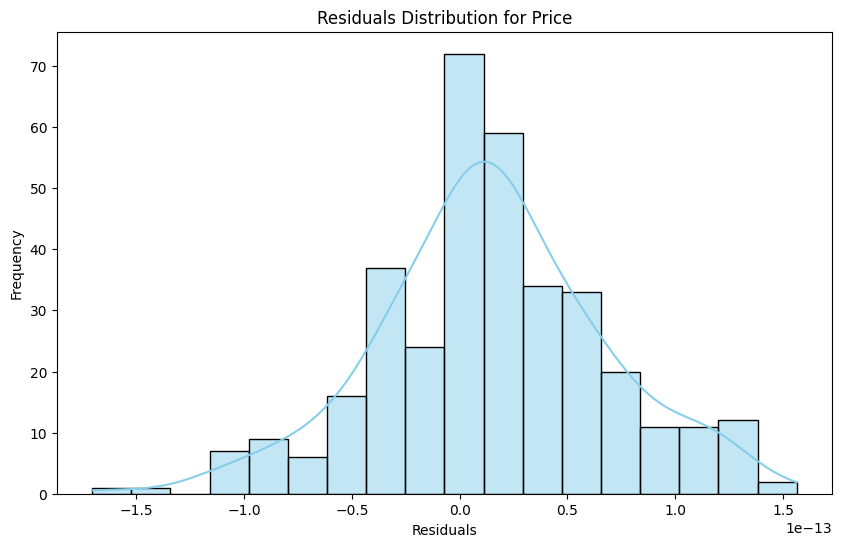

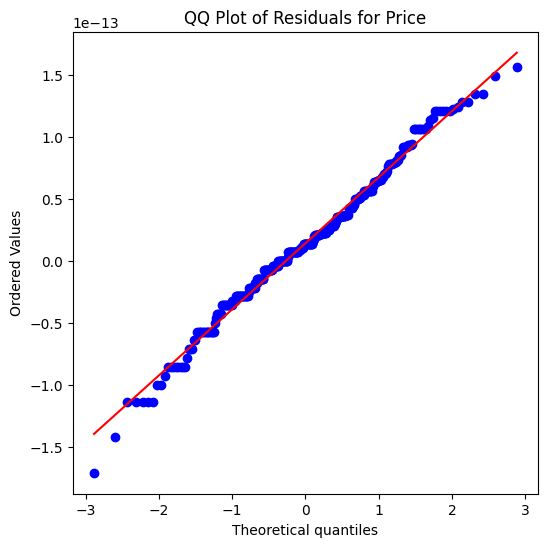


Linear Regression Model Evaluation for Income:
R-squared: 1.0000
Mean Squared Error (MSE): 0.0000


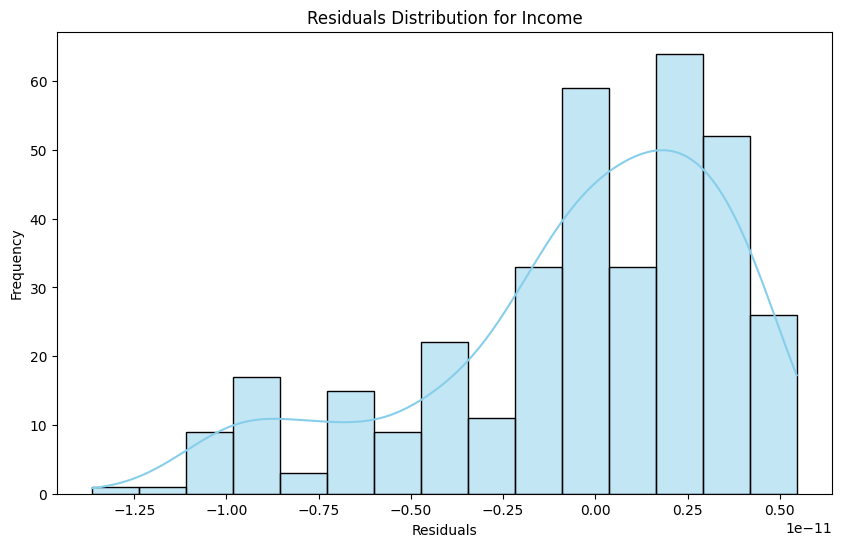

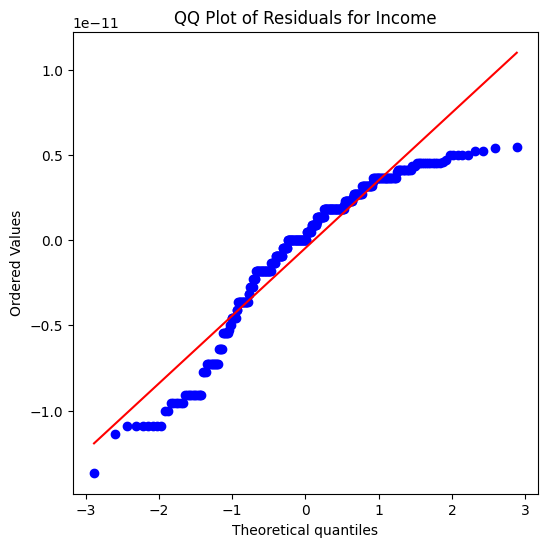


Cross-Validation for Price Model
Cross-Validation Scores (R-squared): [1. 1. 1. 1. 1.]
Mean CV R-squared: 1.0000
Standard Deviation of CV Scores: 0.0000

Cross-Validation for Income Model
Cross-Validation Scores (R-squared): [1. 1. 1. 1. 1.]
Mean CV R-squared: 1.0000
Standard Deviation of CV Scores: 0.0000


In [55]:
# Apply Linear Regression for 'price' and 'income'
price_model, price_r2, price_mse = linear_regression_model(X_train_price, y_train_price, X_test_price, y_test_price, "Price")
income_model, income_r2, income_mse = linear_regression_model(X_train_income, y_train_income, X_test_income, y_test_income, "Income")

# Cross-Validation for Model Evaluation and Enhancement
def cross_validation(model, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    print(f"Cross-Validation Scores (R-squared): {cv_scores}")
    print(f"Mean CV R-squared: {np.mean(cv_scores):.4f}")
    print(f"Standard Deviation of CV Scores: {np.std(cv_scores):.4f}")
    return cv_scores

# Cross-validate for both 'price' and 'income' models
print("\nCross-Validation for Price Model")
cv_scores_price = cross_validation(price_model, X, y_price)
print("\nCross-Validation for Income Model")
cv_scores_income = cross_validation(income_model, X, y_income)

In [56]:
# Thank You.
